# Conjunto de Datos #1: daily-total-female-births.csv

## Analisis exploratorio

In [275]:
from Def_funciones import *

import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
#from multiprocessing import cpu_count

from multiprocess import cpu_count
from joblib import Parallel

from joblib import delayed



In [276]:
series = pd.read_csv('daily-total-female-births.csv', header=0, 
                     parse_dates = ["Date"], index_col = 0)
print(series.describe())

           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


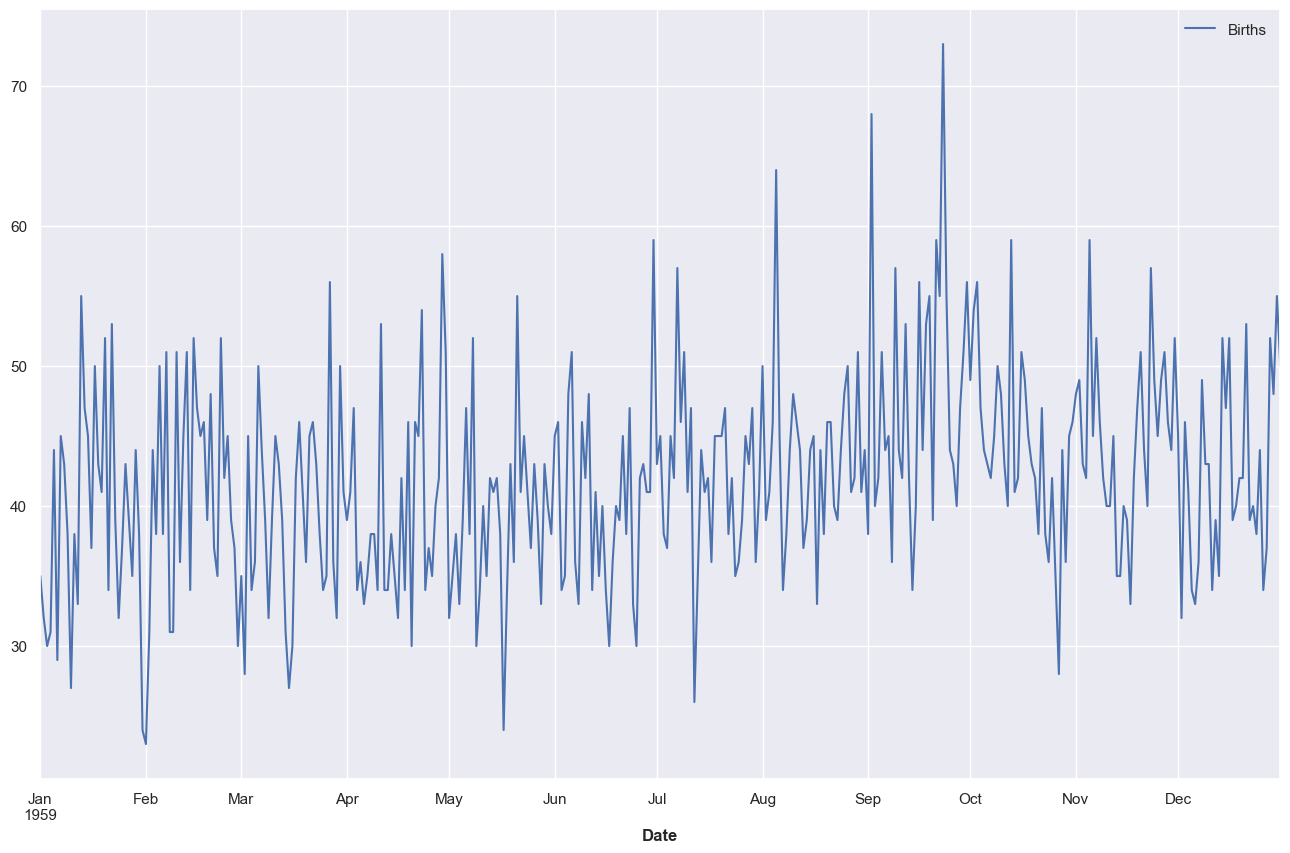

In [277]:
#import seaborn; seaborn.set()
series.plot(figsize=(16,10))
plt.savefig('nac_fem.png', transparent = True)

Realizando la prueba de Dickey-Fuller Aumentada (ADF) para determinar si la serie de tiempo es estacionaria.
Un resultado de p-value menor que 0.05 generalmente indica estacionariedad, lo cual es una propiedad importante para muchos modelos de series de tiempo.


In [278]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series['Births'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05


Gráficos de autocorrelación y autocorrelación parcial para estudiar las relaciones temporales en los datos de nacimientos.

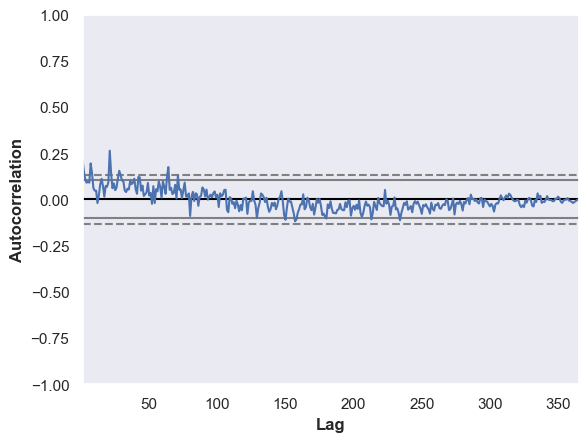

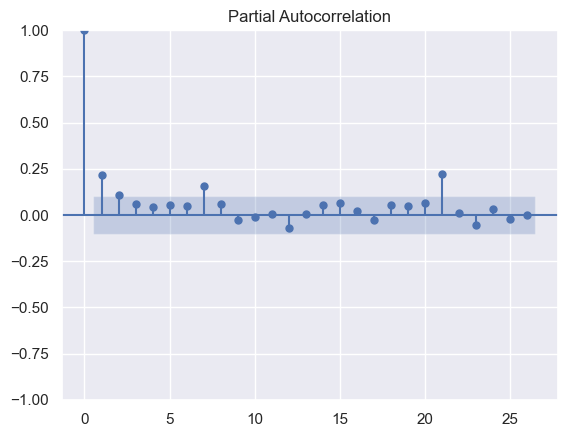

In [279]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

autocorrelation_plot(series)
plot_pacf(series)
plt.show()


Generando gráficas de caja para analizar la variabilidad de los nacimientos de mujeres por mes y por día.

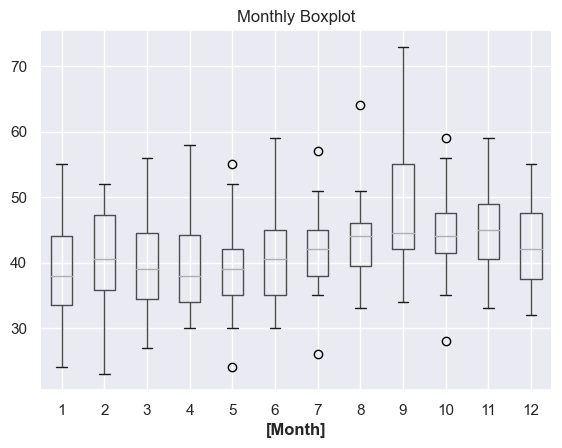

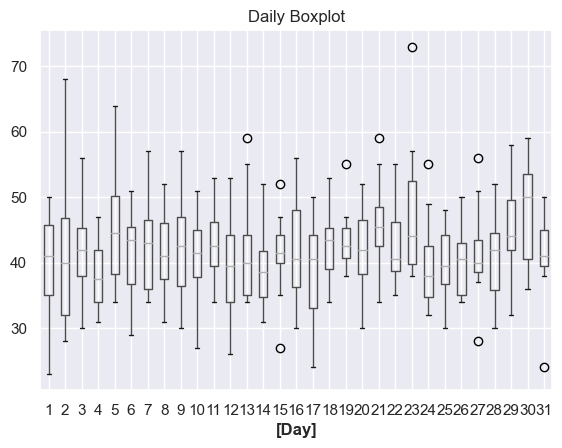

In [280]:
series.index = pd.to_datetime(series.index)

# Asegúrate de que el índice es de tipo datetime
series.index = pd.to_datetime(series.index)

# Crea nuevas columnas para el año, mes y día
series['Year'] = [d.year for d in series.index]
series['Month'] = [d.month for d in series.index]
series['Day'] = [d.day for d in series.index]

# Haz los boxplots
series.boxplot(column=['Births'], by=['Month'])
plt.title('Monthly Boxplot')
plt.suptitle('')

series.boxplot(column=['Births'], by=['Day'])
plt.title('Daily Boxplot')
plt.suptitle('')

plt.show()

## Promedios

In [281]:
series

,Births,Year,Month,Day
Date,,,,
1959-01-01,35,1959,1,1
1959-01-02,32,1959,1,2
1959-01-03,30,1959,1,3
1959-01-04,31,1959,1,4
1959-01-05,44,1959,1,5
...,...,...,...,...
1959-12-27,37,1959,12,27
1959-12-28,52,1959,12,28
1959-12-29,48,1959,12,29


Tamaño Entrenamiento 292
Tamaño Prueba 73
Encontrando la mejor solución para promedio
584
terminado
[192, 'mediana'] 6.375251808080867
[191, 'mediana'] 6.380621346477417
[153, 'mediana'] 6.394561045052593


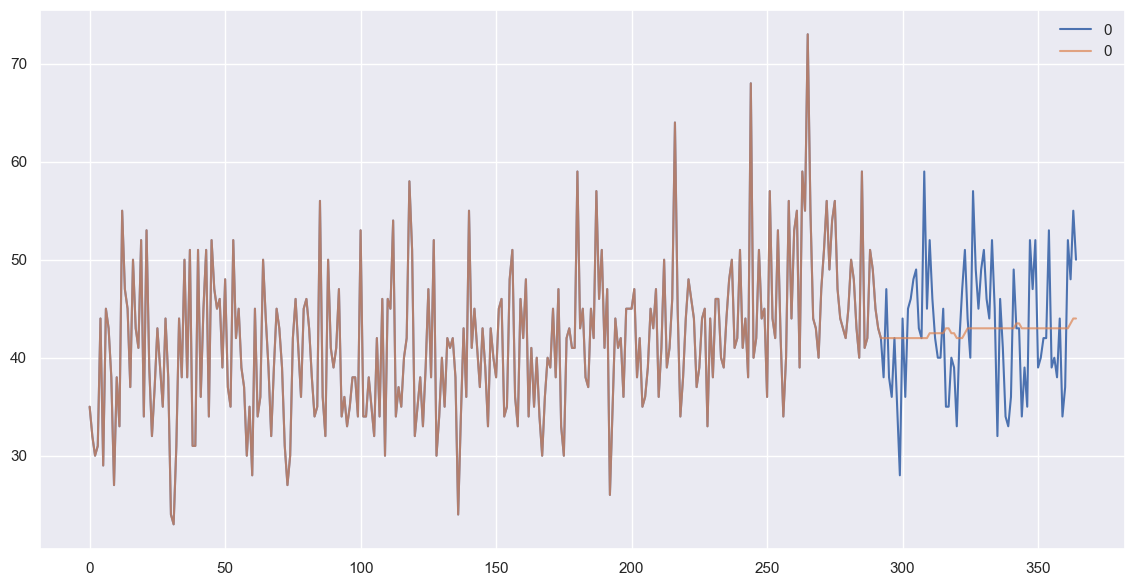

In [282]:
series = pd.read_csv('daily-total-female-births.csv', header = 0, index_col = 0)
nombre = "nacimiento-feminas"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")

## SARIMA

Tamaño Entrenamiento 292
Tamaño Prueba 73
Encontrando la mejor solución para sarima
72
terminado
[(2, 0, 0), (0, 0, 0, 0), 'c'] 6.229422865233929
[(1, 0, 0), (0, 0, 0, 0), 'c'] 6.271032081964668
[(0, 0, 2), (0, 0, 0, 0), 'c'] 6.272134385512857


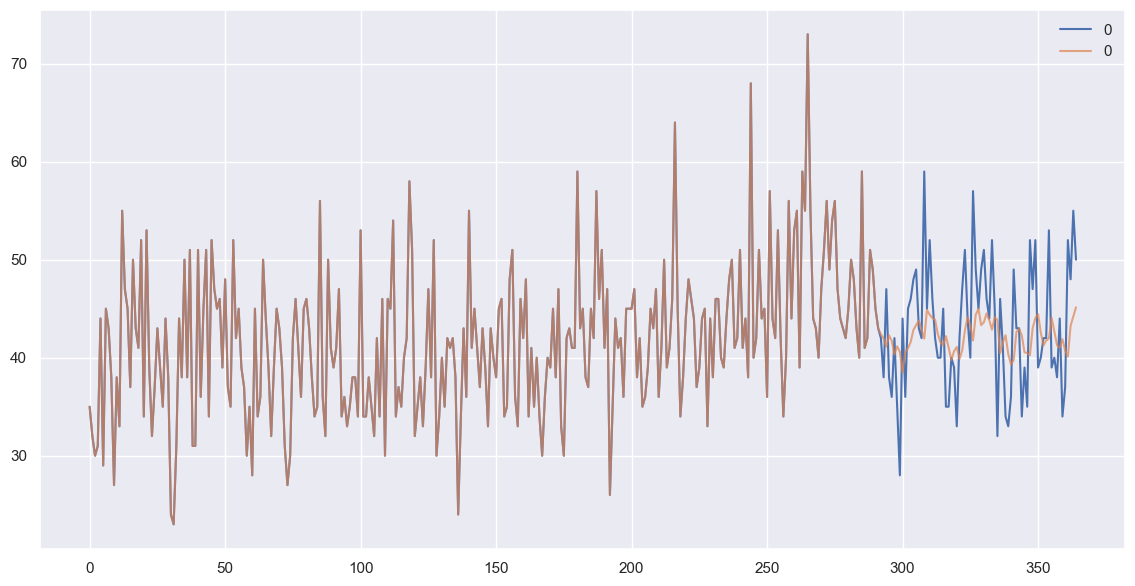

In [283]:
series = pd.read_csv('daily-total-female-births.csv', header = 0, index_col = 0)
nombre = "nacimiento-feminas"
encontrar_mejor_solucion(series, nombre, metodo = "sarima")

## Alisamiento Exponencial

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [285]:
series = pd.read_csv('daily-total-female-births.csv', delimiter=",")
series

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [286]:
serie = TimeSeries.from_dataframe(series, "Date", "Births")
serie

<TimeSeries (DataArray) (Date: 365, component: 1, sample: 1)>
array([[[35.]],

       [[32.]],

       [[30.]],

       [[31.]],

       [[44.]],

       [[29.]],

       [[45.]],

       [[43.]],

       [[38.]],

       [[27.]],

...

       [[39.]],

       [[40.]],

       [[38.]],

       [[44.]],

       [[34.]],

       [[37.]],

       [[52.]],

       [[48.]],

       [[55.]],

       [[50.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1959-01-01 1959-01-02 ... 1959-12-31
  * component  (component) object 'Births'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

**División en dos partes:  entreno y validación (o prueba)**

In [287]:
entreno, validacion = serie[:-40], serie[-40:]

**Instanciar un modelo de la clase ExponentialSmoothing**

In [288]:
modelo = ExponentialSmoothing()

**Entrenamiento con la serie para entrenamiento**

In [289]:
modelo.fit(entreno)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

**Predicción con la serie para validación**

In [290]:
prediccion = modelo.predict(len(validacion), num_samples = 1000)

**Graficamos con Matplotlib**

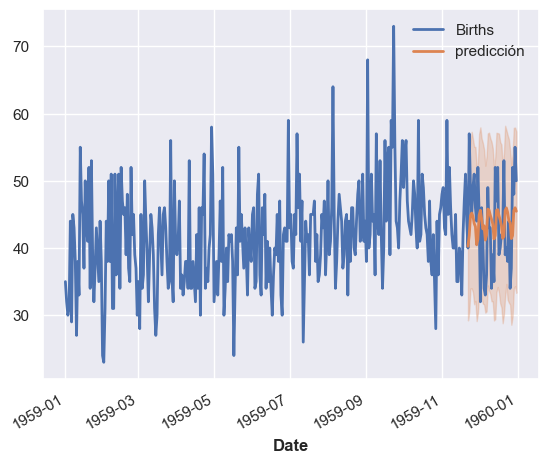

In [291]:
serie.plot()
prediccion.plot(label = "predicción", low_quantile = 0.05, high_quantile = 0.95)
plt.legend()

In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Obteniendo los arrays de los valores reales y predichos
y_real = validacion.values()
y_pred = prediccion.values()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
print('Root Mean Square Error:', rmse)

# Calcular MAE
mae = mean_absolute_error(y_real, y_pred)
print('Mean Absolute Error:', mae)


Root Mean Square Error: 10.284151341585561
Mean Absolute Error: 8.719168333829309


## Prophet

In [293]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


01:03:45 - cmdstanpy - INFO - Chain [1] start processing
01:03:45 - cmdstanpy - INFO - Chain [1] done processing


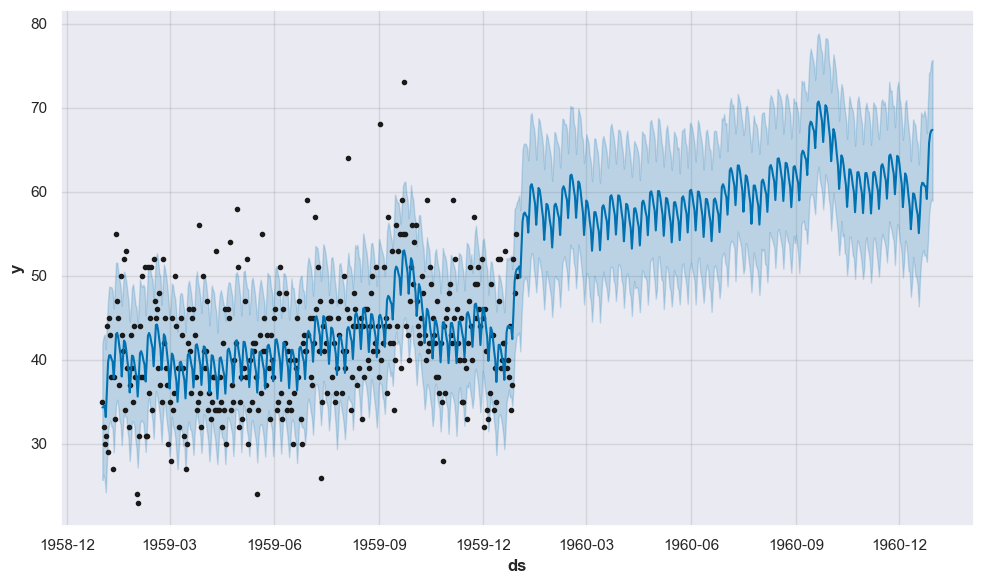

In [294]:
from prophet import Prophet

# Preparar los datos para Prophet
df_prophet = series
df_prophet.columns = ['ds', 'y']

# Inicializar y entrenar el modelo
model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

# Hacer predicciones
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Graficar
fig1 = model.plot(forecast)


In [295]:
# Aquí, "forecast" es el DataFrame que obtienes después de llamar a model.predict()
y_pred = forecast['yhat'][-365:].values

# Aquí, asumimos que tienes los valores reales para el mismo periodo en "y_real"
y_real = df_prophet['y'][-365:].values

# Calcular RMSE y MAE de igual forma
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


Root Mean Square Error: 19.023310606429245
Mean Absolute Error: 17.88462103635887


## Red Neuronal

In [296]:
series = pd.read_csv('daily-total-female-births.csv', header = 0, index_col = 0)
series

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [297]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd

# Preparación de datos
# Extraer valores como una matriz NumPy y redimensionar para el modelo
X = series['Births'].values[:-1].reshape(-1, 1)
y = series['Births'].values[1:].reshape(-1, 1)

# Crear y ajustar el modelo
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X, y.ravel())

# Predicciones
predictions = model.predict(X)

# Calcular RMSE
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


Root Mean Square Error: 8.005697413792415
Mean Absolute Error: 6.260706504891167


c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Discusion y resultados

**Promedios:** Los modelos de mediana muestran un RMSE alrededor de 6.37-6.39, lo que es bastante decente para un método simple. Son buenos para datos que no tienen una fuerte componente de tendencia o estacionalidad.

**SARIMA:** Con un RMSE de alrededor de 6.23, SARIMA se desempeña ligeramente mejor que los métodos de promedio. Este método es adecuado para series de tiempo con componentes de tendencia y estacionalidad.

**Alisamiento Exponencial:** Este modelo tiene un RMSE de 10.28 y un MAE de 8.72, lo cual es peor que SARIMA y promedios, por lo que podría no ser la mejor opción para estos datos.

**Prophet:** Con un RMSE de 19.02 y un MAE de 17.88, este modelo es significativamente menos preciso en comparación con los otros métodos y probablemente no sea adecuado para este conjunto de datos.

**Redes Neuronales:** Con un RMSE de 8.00 y un MAE de 6.26, las redes neuronales se desempeñan de manera intermedia, lo que indica que podrían ser útiles para ciertos tipos de datos más complejos, pero en este caso no superan a SARIMA.

Basado en las métricas de rendimiento (RMSE y MAE), el modelo SARIMA se desempeña mejor para este conjunto de datos, seguido muy de cerca por los modelos de mediana. Prophet es el menos preciso, mientras que las redes neuronales y el alisamiento exponencial tienen un desempeño intermedio. Basado en el analisis exploratorio realizado, tambien podemos ver que los datos presentan una gran varianza en la distribucion, ademas presentan alta estacionalidad lo cual concuerda con el resultado obtenido en SARIMA.

# Conjunto de Datos #2: Shampoo

## Analisis exploratorio

In [298]:
from Def_funciones import *

import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
#from multiprocessing import cpu_count

from multiprocess import cpu_count
from joblib import Parallel

from joblib import delayed



In [299]:
series = pd.read_csv('shampoo.csv', header=0, index_col = 0)
series.head()
# print(series.describe())

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<AxesSubplot: xlabel='date'>

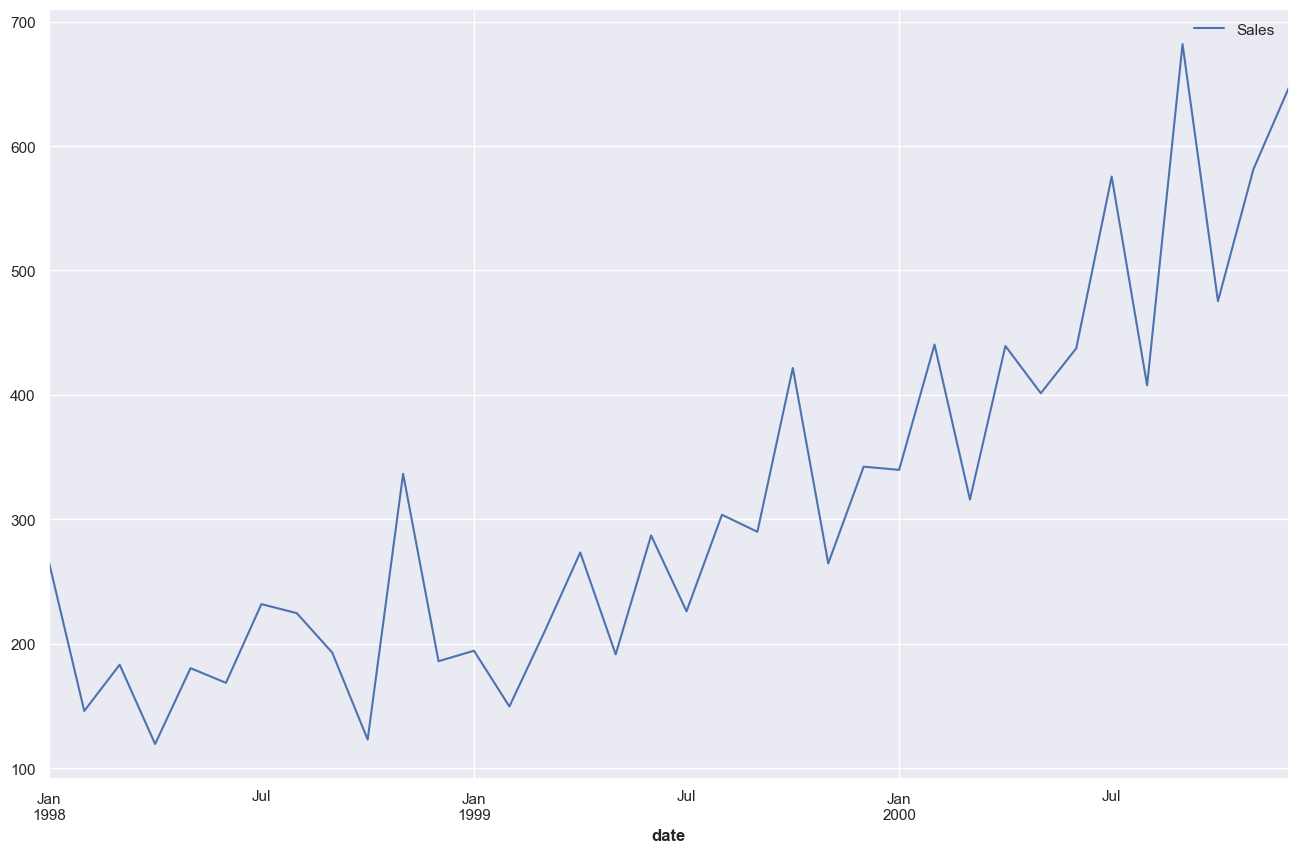

In [300]:
series = pd.read_csv('shampoo.csv', header=0)
series["Year"] = [1998] * 12 + [1999] * 12 + [2000] * 12
series["Month"] = list(range(1,13)) * 3
series["Date"] = series["Month"].apply(str) + "-" + series["Year"].apply(str)
series['date']  = pd.to_datetime(series["Date"])
series = series[["date","Sales"]]
series.set_index(['date'],inplace = True)

import seaborn; seaborn.set()
series.plot(figsize = (16,10))

In [301]:
series

,Sales
date,
1998-01-01,266.0
1998-02-01,145.9
1998-03-01,183.1
1998-04-01,119.3
1998-05-01,180.3
1998-06-01,168.5
1998-07-01,231.8
1998-08-01,224.5
1998-09-01,192.8


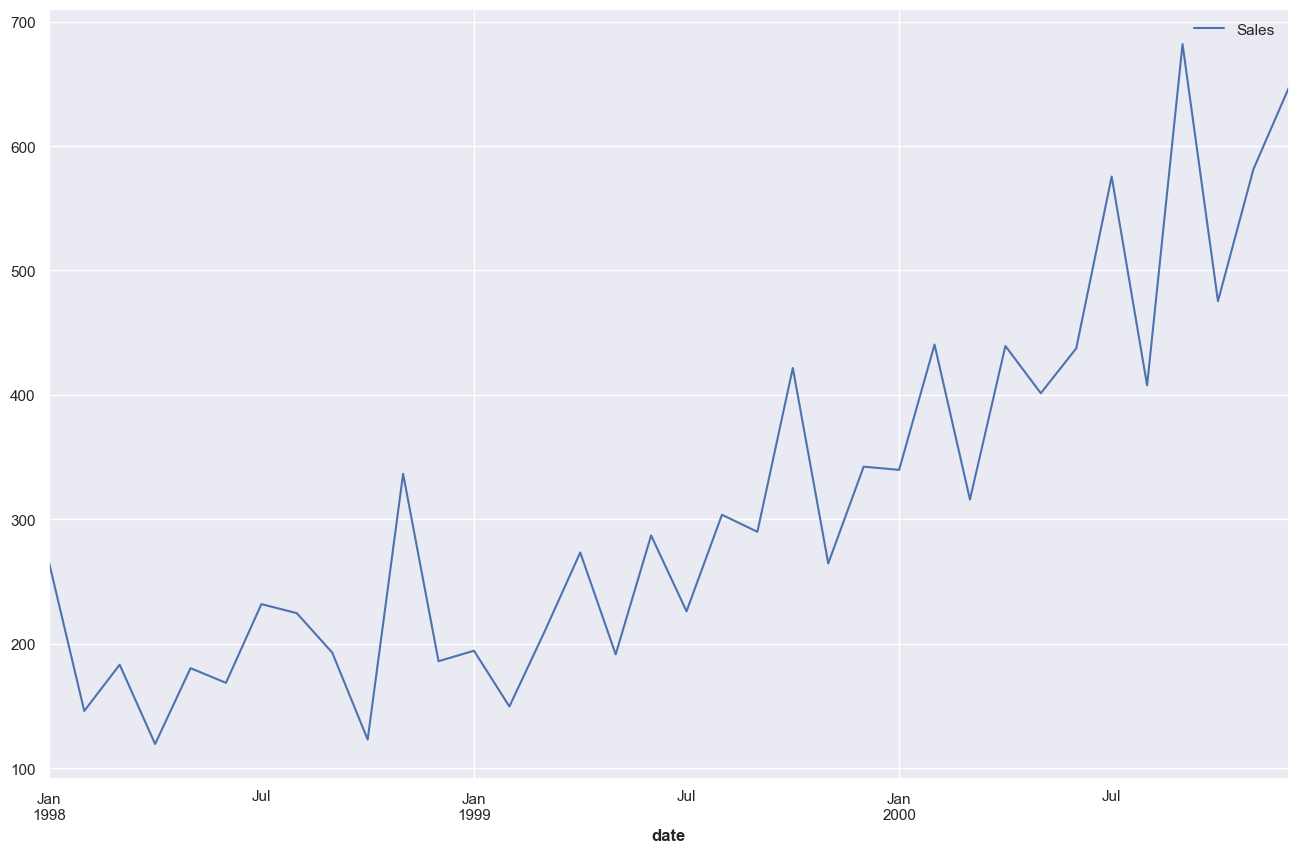

In [302]:
#import seaborn; seaborn.set()
series.plot(figsize=(16,10))
plt.savefig('shampoo.png', transparent = True)

Realizando la prueba de Dickey-Fuller Aumentada (ADF) para determinar si la serie de tiempo es estacionaria.
Un resultado de p-value menor que 0.05 generalmente indica estacionariedad, lo cual es una propiedad importante para muchos modelos de series de tiempo.


In [303]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 3.0601420836411815
p-value: 1.0


Gráficos de autocorrelación y autocorrelación parcial para estudiar las relaciones temporales en los datos de nacimientos.

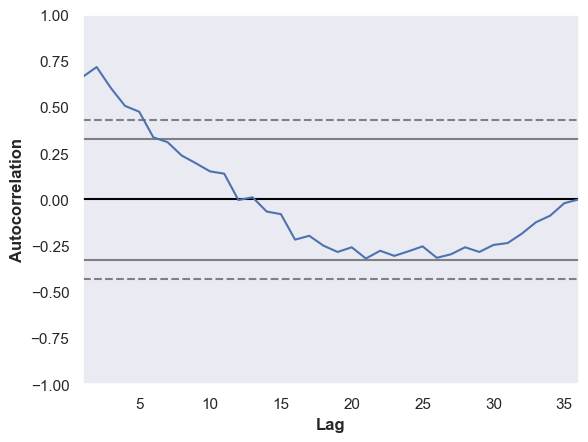

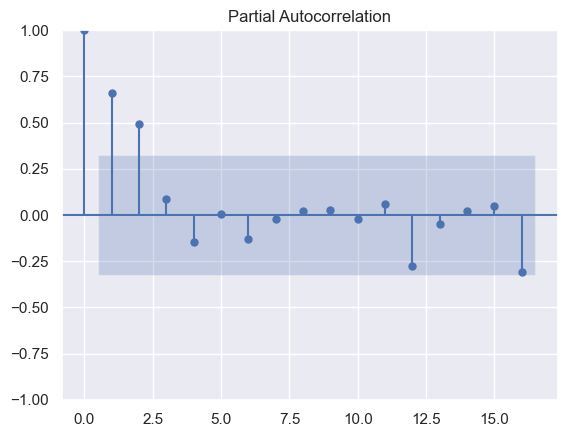

In [304]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

autocorrelation_plot(series)
plot_pacf(series)
plt.show()


## Promedios

Tamaño Entrenamiento 29
Tamaño Prueba 7
Encontrando la mejor solución para promedio
58
terminado
[3, 'promedio'] 111.5106230258761
[2, 'mediana'] 113.1503361525213
[2, 'promedio'] 113.1503361525213


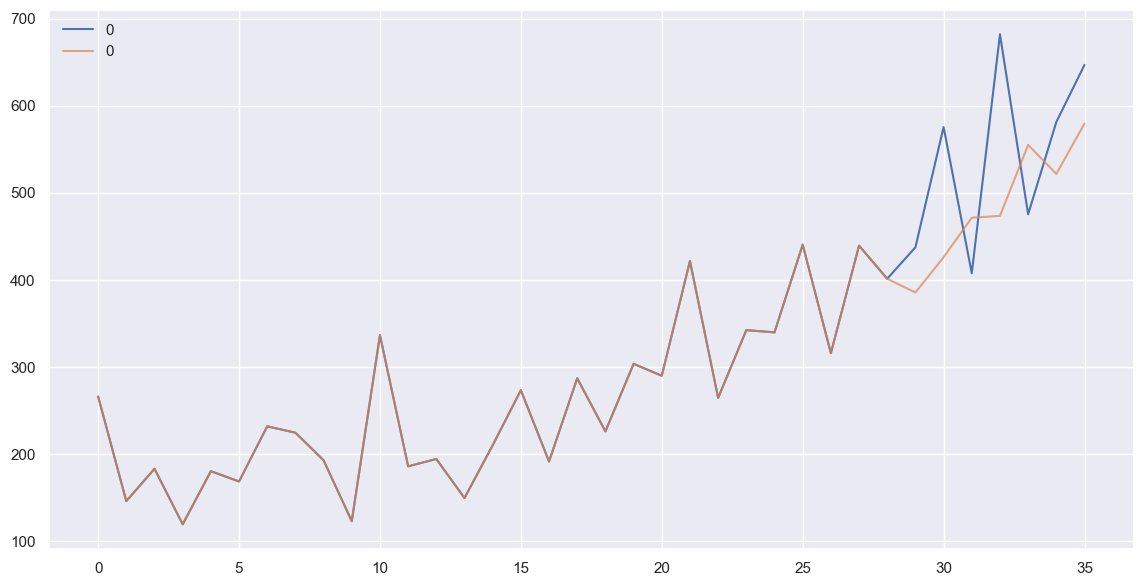

In [305]:
series = pd.read_csv('shampoo.csv', header = 0, index_col = 0)
nombre="shampoo"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")

## SARIMA

Tamaño Entrenamiento 29
Tamaño Prueba 7
Encontrando la mejor solución para sarima
72
terminado
[(0, 1, 2), (0, 0, 0, 0), 'c'] 69.40198408541099
[(1, 0, 2), (0, 0, 0, 0), 't'] 70.12767863264845
[(1, 1, 1), (0, 0, 0, 0), 'ct'] 72.00857814735072


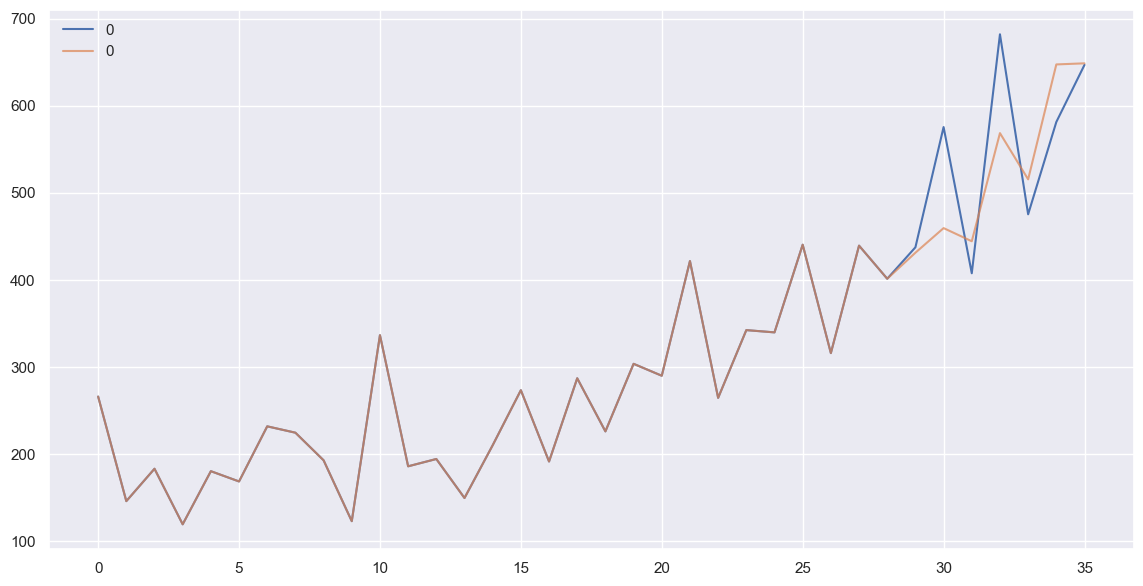

In [306]:
series = pd.read_csv('shampoo.csv', header = 0, index_col = 0)
nombre="shampoo"
encontrar_mejor_solucion(series, nombre, metodo = "sarima")

## Alisamiento Exponencial

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [308]:
series = pd.read_csv('shampoo.csv', delimiter=",")

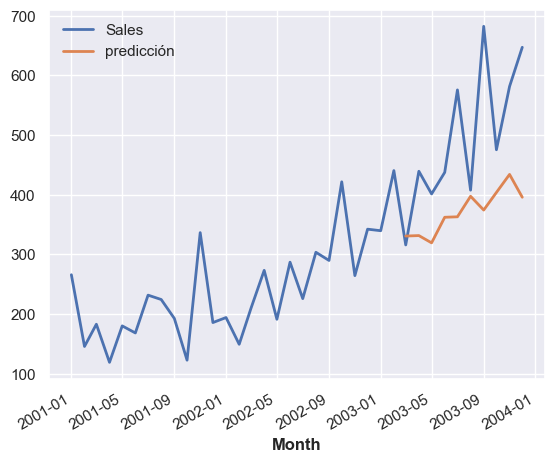

In [309]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.metrics import mae, rmse
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Month' a datetime
series['Month'] = pd.to_datetime('200' + series['Month'], format='%Y-%m')

# Convertimos a TimeSeries
serie = TimeSeries.from_dataframe(series, "Month", "Sales")

# Dividmos en entrenamiento y validación
entreno, validacion = serie[:-10], serie[-10:]

# Inicializar y ajustar el modelo
modelo = ExponentialSmoothing()
modelo.fit(entreno)

prediccion = modelo.predict(len(validacion))

# Graficar
serie.plot()
prediccion.plot(label="predicción")
plt.legend()
plt.show()


In [310]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcular RMSE y MAE
print('RMSE:', rmse(validacion, prediccion))
print('MAE:', mae(validacion, prediccion))

RMSE: 159.37289427348733
MAE: 128.0036965675553


## Prophet

In [311]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [312]:
series = pd.read_csv('shampoo.csv', delimiter=",")
series

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


01:04:23 - cmdstanpy - INFO - Chain [1] start processing
01:04:24 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 559.8181758948064
MAE: 408.8670713322516


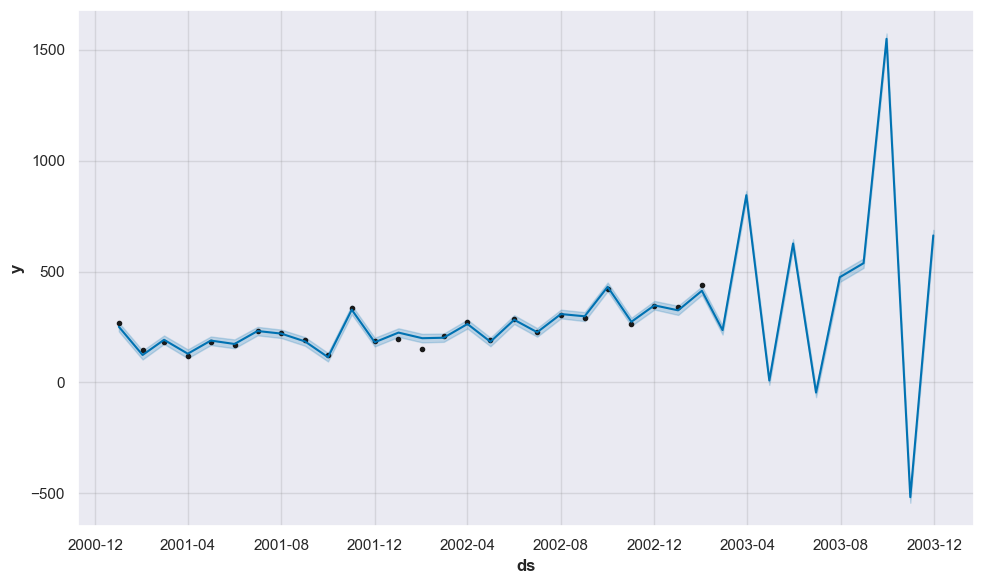

In [313]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que series es tu DataFrame original
# Convertimos la columna 'Month' a un formato que Prophet pueda entender
series['ds'] = pd.to_datetime('200' + series['Month'], format='%Y-%m')
series = series.drop(['Month'], axis=1)

# Renombramos las columnas para que se ajusten a lo que Prophet espera
series.columns = ['y', 'ds']

# Dividir el conjunto de datos en entrenamiento y validación
train = series[:-10]
val = series[-10:]

# Inicializar y ajustar el modelo
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Hacer predicciones
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)

# Graficar las predicciones
fig = model.plot(forecast)

# Extraer las predicciones y calcular el error cuadrático medio y el error absoluto medio
y_pred = forecast['yhat'][-10:].values
y_true = val['y'].values

rmse_value = np.sqrt(mean_squared_error(y_true, y_pred))
mae_value = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse_value}")
print(f"MAE: {mae_value}")


## Red Neuronal

In [315]:
series = pd.read_csv('shampoo.csv', header = 0, index_col = 0)
series

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


Epoch 1/200


13/13 - 0s - loss: 0.0400 - 326ms/epoch - 25ms/step
Epoch 2/200
13/13 - 0s - loss: 0.0349 - 11ms/epoch - 846us/step
Epoch 3/200
13/13 - 0s - loss: 0.0305 - 10ms/epoch - 769us/step
Epoch 4/200
13/13 - 0s - loss: 0.0273 - 11ms/epoch - 846us/step
Epoch 5/200
13/13 - 0s - loss: 0.0249 - 10ms/epoch - 769us/step
Epoch 6/200
13/13 - 0s - loss: 0.0230 - 11ms/epoch - 846us/step
Epoch 7/200
13/13 - 0s - loss: 0.0219 - 10ms/epoch - 769us/step
Epoch 8/200
13/13 - 0s - loss: 0.0208 - 10ms/epoch - 769us/step
Epoch 9/200
13/13 - 0s - loss: 0.0203 - 11ms/epoch - 846us/step
Epoch 10/200
13/13 - 0s - loss: 0.0198 - 9ms/epoch - 692us/step
Epoch 11/200
13/13 - 0s - loss: 0.0195 - 10ms/epoch - 769us/step
Epoch 12/200
13/13 - 0s - loss: 0.0195 - 10ms/epoch - 769us/step
Epoch 13/200
13/13 - 0s - loss: 0.0195 - 10ms/epoch - 769us/step
Epoch 14/200
13/13 - 0s - loss: 0.0193 - 10ms/epoch - 769us/step
Epoch 15/200
13/13 - 0s - loss: 0.0193 - 10ms/epoch - 769us/step
Epoch 16/200
13/13 - 0s - loss: 0.0193 - 9ms/ep

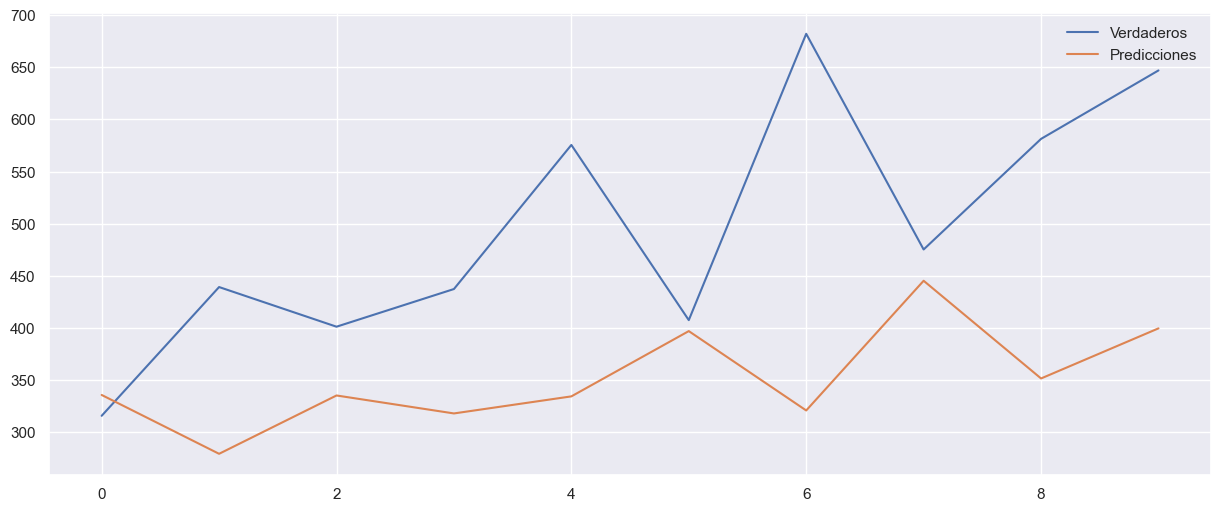

In [316]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

# Leer los datos
# series = pd.read_csv('shampoo.csv', delimiter=",")

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series['Sales'].values.reshape(-1, 1))

# Preparar los datos para la red neuronal
X, y = [], []
for i in range(1, len(scaled_data)):
    X.append(scaled_data[i-1:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = len(X) - 10
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Construir la red neuronal
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

# Hacer predicciones
y_pred = model.predict(X_test)

# Transformar las predicciones de vuelta a la escala original
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Gráfico
plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Verdaderos')
plt.plot(y_pred_original, label='Predicciones')
plt.legend()
plt.show()


## Discusion y resultados

**Promedios**: Con RMSEs superiores a 111 y MAE no reportados, los métodos de promedio muestran un rendimiento claramente inferior en este conjunto de datos, lo que podría indicar una mayor complejidad en la serie temporal que no puede ser capturada por métodos simples.

**SARIMA**: Este modelo tiene un RMSE considerablemente más bajo, alrededor de 69.4, lo que sugiere que las técnicas más sofisticadas de modelado de series temporales son más adecuadas para este conjunto de datos. Los diferentes parámetros también indican que hay una cierta tendencia y quizás alguna estacionalidad en los datos.

**Alisamiento Exponencial:** Con un RMSE de 159.37 y un MAE de 128.00, este modelo se desempeña significativamente peor que SARIMA, lo que sugiere que la forma específica de la tendencia o estacionalidad en los datos no se ajusta bien a las suposiciones del modelo de alisamiento exponencial.

**Prophet**: Este modelo tiene un rendimiento particularmente pobre, con un RMSE de 559.82 y un MAE de 408.87. Esto sugiere que, a pesar de su capacidad para manejar una variedad de componentes de series temporales, Prophet no es adecuado para este conjunto de datos en particular.

**Redes Neuronales:** Con un RMSE de 186.47 y un MAE de 148.42, las redes neuronales se desempeñan mejor que el alisamiento exponencial y Prophet pero siguen siendo superadas por SARIMA. Este resultado implica que, aunque los datos pueden tener una estructura más compleja, no es suficiente como para justificar el uso de un modelo de red neuronal para este caso específico.

El hecho de que SARIMA y, en menor medida, las redes neuronales se desempeñen mejor sugiere que la serie temporal tiene componentes complejos como la tendencia y quizás la estacionalidad que necesitan modelos más sofisticados. La amplia gama en los resultados de RMSE y MAE entre diferentes modelos puede sugerir que el conjunto de datos tiene características específicas que se ajustan de manera diferente a los modelos seleccionados, subrayando la importancia de una selección cuidadosa del modelo.

# Conjunto de Datos #3: monthly-mean-temp.csv

## Analisis exploratorio

In [317]:
from Def_funciones import *

import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
#from multiprocessing import cpu_count

from multiprocess import cpu_count
from joblib import Parallel

from joblib import delayed



In [318]:
series = pd.read_csv('monthly-mean-temp.csv', header=0, index_col = 0)
series.head()
# print(series.describe())

,Temperature
Month,
1920-01,40.6
1920-02,40.8
1920-03,44.4
1920-04,46.7
1920-05,54.1


<AxesSubplot: xlabel='Month'>

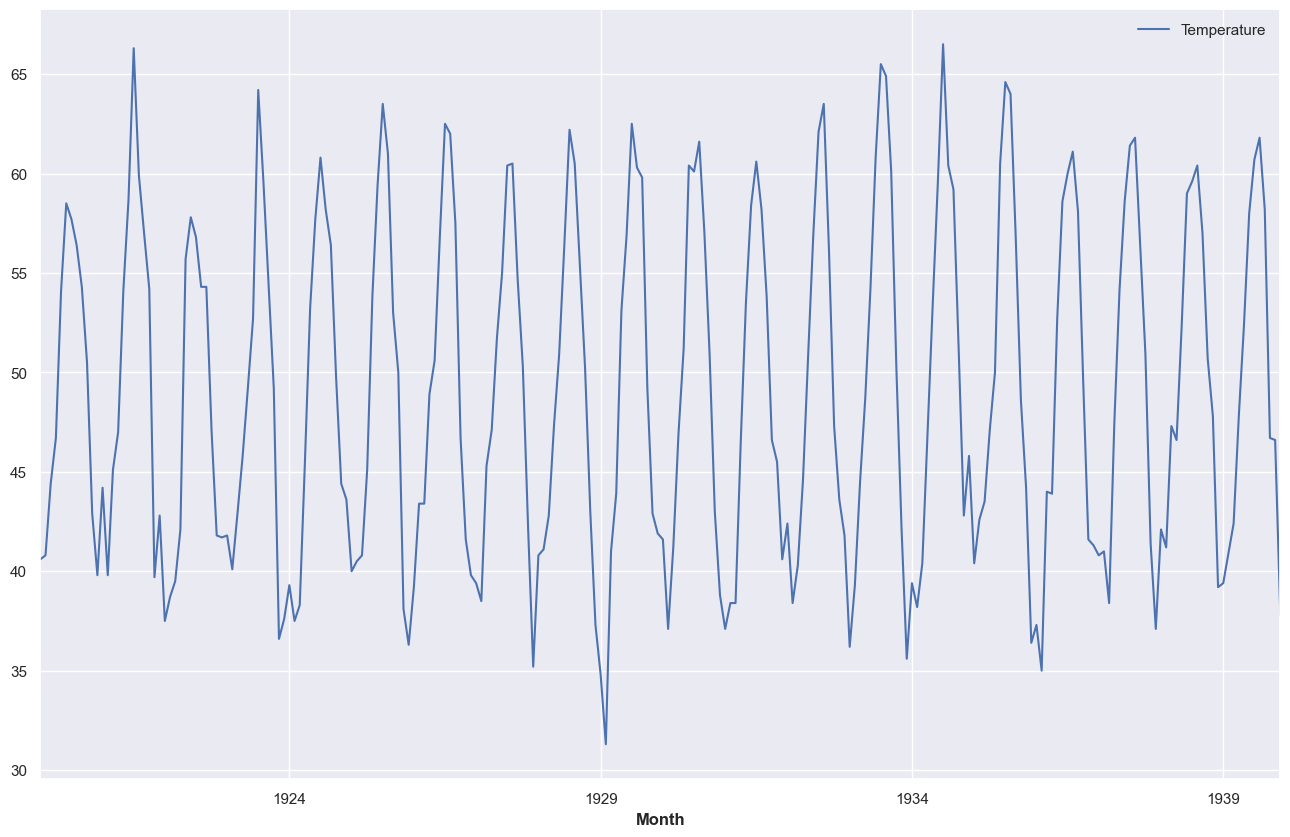

In [319]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, parse_dates = ["Month"])
series.set_index(['Month'],inplace=True)
import seaborn; seaborn.set()
series.plot(figsize = (16,10))

In [320]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, parse_dates = ["Month"])
series

,Month,Temperature
0,1920-01-01,40.6
1,1920-02-01,40.8
2,1920-03-01,44.4
3,1920-04-01,46.7
4,1920-05-01,54.1
...,...,...
235,1939-08-01,61.8
236,1939-09-01,58.2
237,1939-10-01,46.7
238,1939-11-01,46.6


Realizando la prueba de Dickey-Fuller Aumentada (ADF) para determinar si la serie de tiempo es estacionaria.
Un resultado de p-value menor que 0.05 generalmente indica estacionariedad, lo cual es una propiedad importante para muchos modelos de series de tiempo.


In [321]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series['Temperature'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.2554924030863353
p-value: 0.016989030222608687


## Promedios

Tamaño Entrenamiento 192
Tamaño Prueba 48
Encontrando la mejor solución para promedio
384
terminado
[1, 'mediana'] 5.143604443060009
[1, 'promedio'] 5.143604443060009
[2, 'mediana'] 6.595216069242917


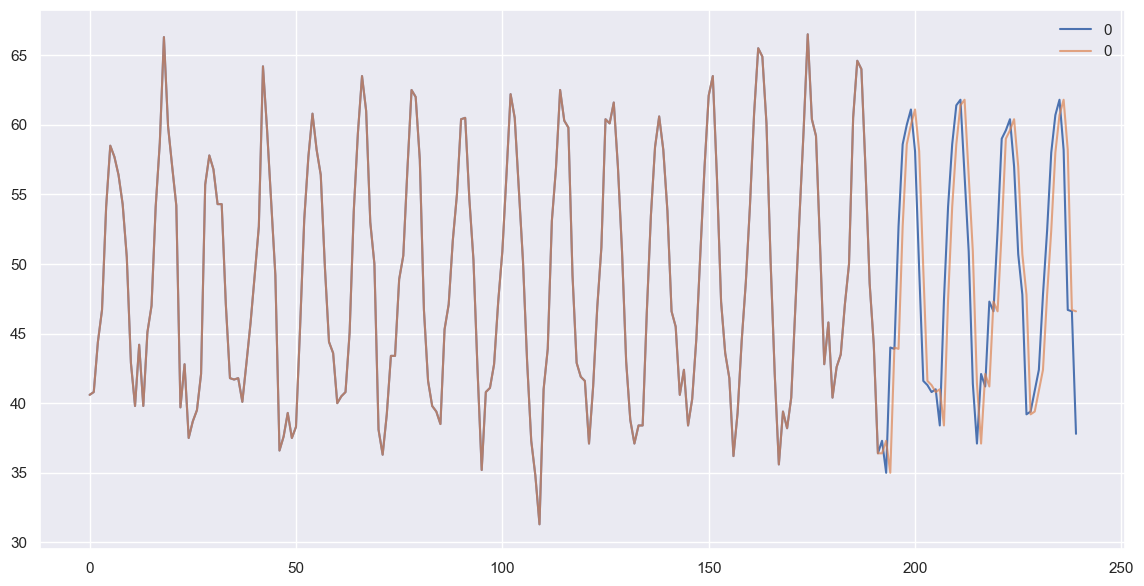

In [322]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, index_col = 0)
nombre="monthly-mean-temp"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")

## SARIMA

Tamaño Entrenamiento 192
Tamaño Prueba 48
Encontrando la mejor solución para sarima
72
terminado
[(2, 0, 2), (0, 0, 0, 0), 'c'] 2.2453818097014175
[(2, 1, 2), (0, 0, 0, 0), 'c'] 3.098026396405791
[(2, 1, 2), (0, 0, 0, 0), 'n'] 3.0984914906948022


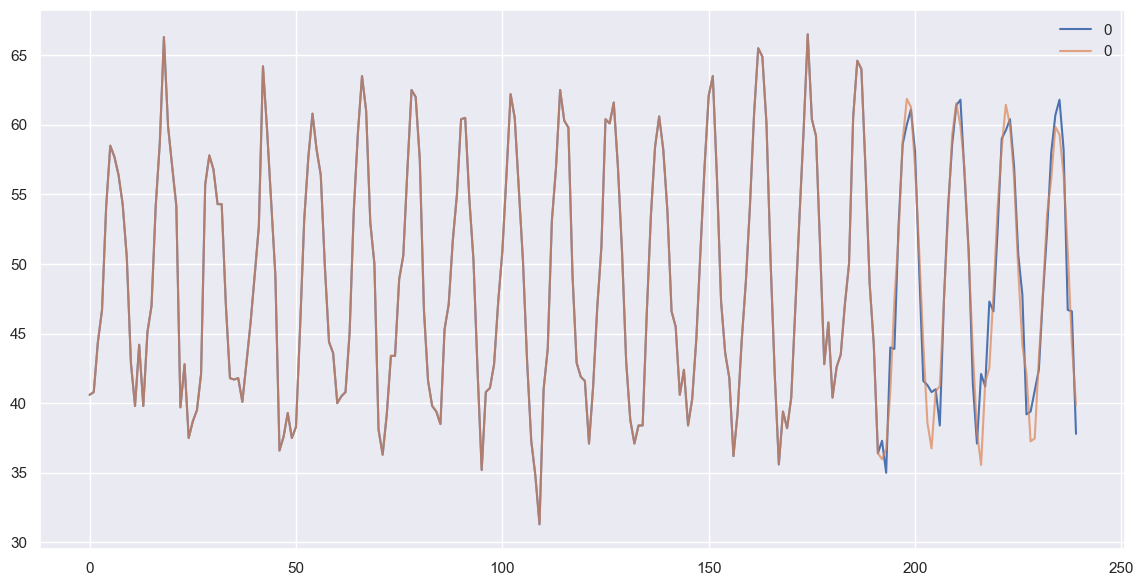

In [323]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, index_col = 0)
nombre="monthly-mean-temp"
encontrar_mejor_solucion(series, nombre, metodo = "sarima")

## Alisamiento Exponencial

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [325]:
series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")

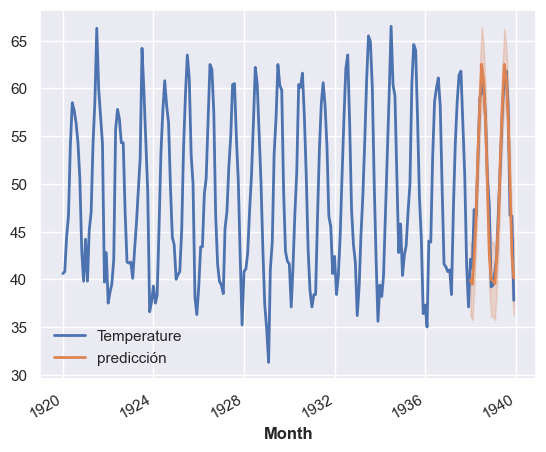

In [326]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt

series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")
series['Month'] = pd.to_datetime(series['Month'])  # Asegúrate de que la columna 'Month' esté en formato de fecha

# Se crea una serie temporal Darts desde el DataFrame
serie = TimeSeries.from_dataframe(series, 'Month', 'Temperature')

# Se divide la serie en conjuntos de entrenamiento y validación
entreno, validacion = serie[:-24], serie[-24:]

# Se crea y ajusta el modelo de alisamiento exponencial
modelo = ExponentialSmoothing()
modelo.fit(entreno)

prediccion = modelo.predict(len(validacion), num_samples=1000)

# Graficar
serie.plot()
prediccion.plot(label="predicción", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()


In [327]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

# Extrae los valores reales y las predicciones como arrays numpy
y_real = validacion.values()
y_pred = prediccion.values()

# Calcula RMSE y MAE
rmse = sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


Root Mean Square Error: 3.602728500700514
Mean Absolute Error: 2.8546348366560053


## Prophet

In [328]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


01:05:45 - cmdstanpy - INFO - Chain [1] start processing
01:05:45 - cmdstanpy - INFO - Chain [1] done processing


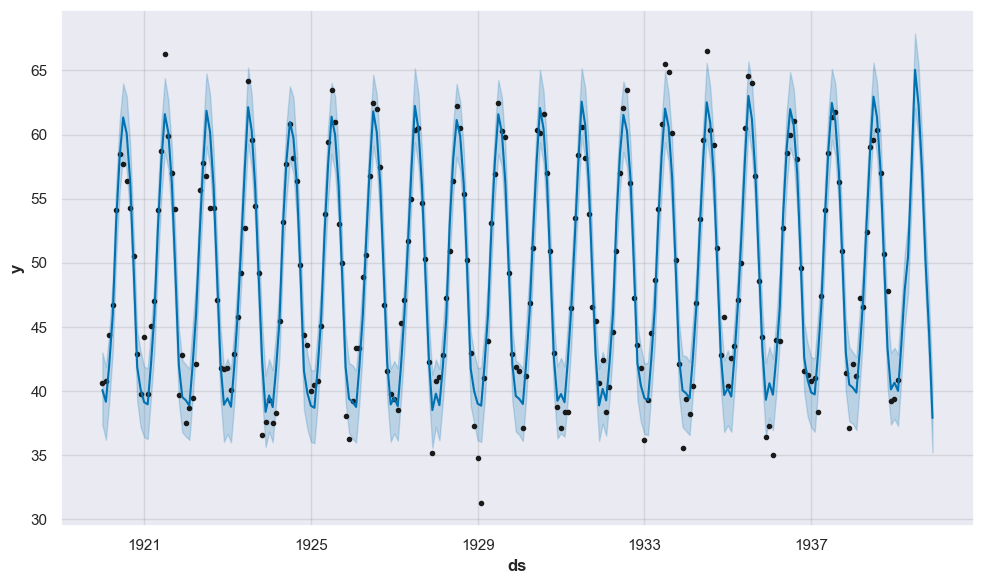

In [329]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Lee el conjunto de datos (si ya lo has hecho, ignora este paso)
# series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")

# Renombra las columnas para que se ajusten a los requisitos de Prophet
series.columns = ['ds', 'y']

# Separa el conjunto de datos en datos de entrenamiento y validación
train = series[:-10]
validation = series[-10:]

# Inicializa y entrena el modelo Prophet
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Realiza las predicciones
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)

# Grafica las predicciones
fig = model.plot(forecast)
plt.show()

In [330]:
# Calcula RMSE y MAE para las predicciones
y_pred = forecast['yhat'][-10:].values
y_real = validation['y'].values

rmse = sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)

Root Mean Square Error: 2.0280333787955658
Mean Absolute Error: 1.4811812278078271


## Red Neuronal

In [331]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, index_col = 0)
series

,Temperature
Month,
1920-01,40.6
1920-02,40.8
1920-03,44.4
1920-04,46.7
1920-05,54.1
...,...
1939-08,61.8
1939-09,58.2
1939-10,46.7


In [332]:
series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")

Epoch 1/50


115/115 - 0s - loss: 0.3289 - 400ms/epoch - 3ms/step
Epoch 2/50
115/115 - 0s - loss: 0.0684 - 72ms/epoch - 626us/step
Epoch 3/50
115/115 - 0s - loss: 0.0424 - 71ms/epoch - 617us/step
Epoch 4/50
115/115 - 0s - loss: 0.0375 - 71ms/epoch - 617us/step
Epoch 5/50
115/115 - 0s - loss: 0.0336 - 71ms/epoch - 617us/step
Epoch 6/50
115/115 - 0s - loss: 0.0303 - 71ms/epoch - 617us/step
Epoch 7/50
115/115 - 0s - loss: 0.0275 - 95ms/epoch - 826us/step
Epoch 8/50
115/115 - 0s - loss: 0.0256 - 80ms/epoch - 696us/step
Epoch 9/50
115/115 - 0s - loss: 0.0241 - 80ms/epoch - 696us/step
Epoch 10/50
115/115 - 0s - loss: 0.0226 - 76ms/epoch - 661us/step
Epoch 11/50
115/115 - 0s - loss: 0.0219 - 73ms/epoch - 635us/step
Epoch 12/50
115/115 - 0s - loss: 0.0215 - 70ms/epoch - 609us/step
Epoch 13/50
115/115 - 0s - loss: 0.0211 - 74ms/epoch - 643us/step
Epoch 14/50
115/115 - 0s - loss: 0.0206 - 72ms/epoch - 626us/step
Epoch 15/50
115/115 - 0s - loss: 0.0205 - 74ms/epoch - 644us/step
Epoch 16/50
115/115 - 0s - loss

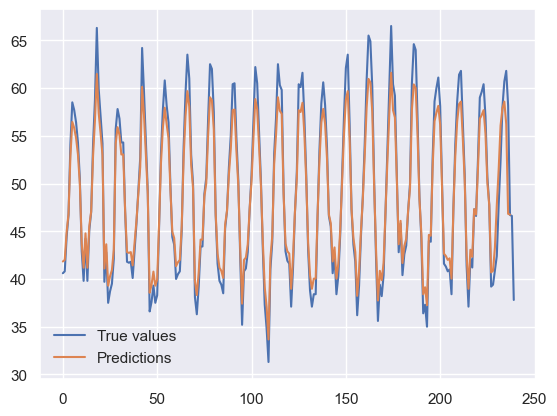

In [333]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Lee el conjunto de datos (si ya lo has hecho, ignora este paso)
# series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(series['Temperature'].values.reshape(-1, 1))

# Separar en conjuntos de entrenamiento y validación
train_size = len(scaled_values) - 10
train, validation = scaled_values[0:train_size, :], scaled_values[train_size:len(scaled_values), :]

# Crear conjunto de datos para el modelo
X_train, y_train = train[:-1], train[1:]
X_val, y_val = validation[:-1], validation[1:]

# Inicializar y construir el modelo
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=2, verbose=2)

# Hacer predicciones
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

# Invertir la normalización para las predicciones
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
val_predict = scaler.inverse_transform(val_predict)
y_val = scaler.inverse_transform(y_val)

# Graficar los resultados
plt.plot(scaler.inverse_transform(scaled_values), label='True values')
plt.plot(np.concatenate([train_predict, val_predict]), label='Predictions')
plt.legend()
plt.show()


In [334]:
# Calcular RMSE y MAE
rmse_train = sqrt(mean_squared_error(y_train, train_predict))
mae_train = mean_absolute_error(y_train, train_predict)
rmse_val = sqrt(mean_squared_error(y_val, val_predict))
mae_val = mean_absolute_error(y_val, val_predict)

print(f'Training data RMSE: {rmse_train}, MAE: {mae_train}')
print(f'Validation data RMSE: {rmse_val}, MAE: {mae_val}')

Training data RMSE: 4.982614588100101, MAE: 4.109273239202374
Validation data RMSE: 5.699317810807773, MAE: 4.8132898966471345


## Discusion y resultados

**Promedios:** Con un RMSE de alrededor de 5.14 usando mediana y promedio para una ventana de 1 punto de tiempo, los métodos de promedio tienen un rendimiento relativamente bueno para ser métodos simples. Sin embargo, son superados por otros modelos más sofisticados.

**SARIMA:** Este modelo tiene el mejor rendimiento entre todos los modelos probados, con un RMSE tan bajo como 2.25. Esto sugiere que SARIMA es particularmente adecuado para este conjunto de datos, posiblemente capturando tanto tendencias como elementos estacionales que otros modelos no pueden.

**Alisamiento Exponencial:** Con un RMSE de 3.60 y un MAE de 2.85, el alisamiento exponencial se desempeña bastante bien pero no es tan efectivo como SARIMA o Prophet en este caso.

**Prophet:** Este modelo se desempeña sorprendentemente bien con un RMSE de 2.03 y un MAE de 1.48, casi rivalizando con SARIMA. Esto podría indicar que Prophet es capaz de capturar complejidades en este conjunto de datos que otros modelos no pueden.

**Redes Neuronales:** Con RMSE y MAE significativamente más altos tanto en los datos de entrenamiento como en los de validación, las redes neuronales son el modelo menos eficiente para este conjunto de datos específico.



# Conjunto de Datos #4: monthly-car-sales.csv

## Analisis exploratorio

In [335]:
series = pd.read_csv('monthly-car-sales.csv', header=0, index_col = 0)
series.head()
# print(series.describe())

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587


<AxesSubplot: xlabel='Month'>

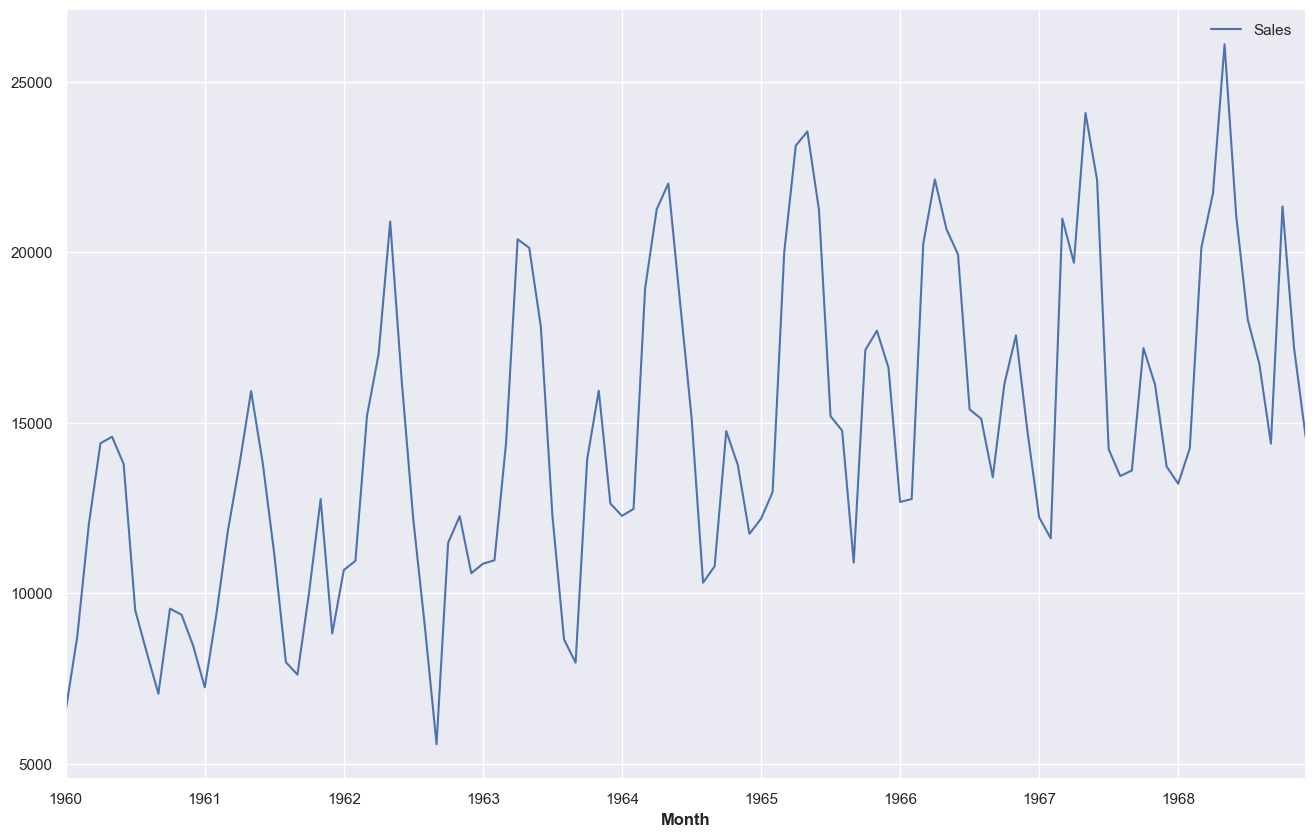

In [336]:
series = pd.read_csv('monthly-car-sales.csv', header = 0, parse_dates = ["Month"])
series.set_index(['Month'],inplace=True)
import seaborn; seaborn.set()
series.plot(figsize = (16,10))

In [337]:
series = pd.read_csv('monthly-car-sales.csv', header = 0, parse_dates = ["Month"])
series

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


Realizando la prueba de Dickey-Fuller Aumentada (ADF) para determinar si la serie de tiempo es estacionaria.
Un resultado de p-value menor que 0.05 generalmente indica estacionariedad, lo cual es una propiedad importante para muchos modelos de series de tiempo.


In [338]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.223812766175284
p-value: 0.6632691049832868


## Promedios

Tamaño Entrenamiento 87
Tamaño Prueba 21
Encontrando la mejor solución para promedio
174
terminado
[1, 'mediana'] 3647.5391182340486
[1, 'promedio'] 3647.5391182340486
[14, 'promedio'] 3768.610301486526


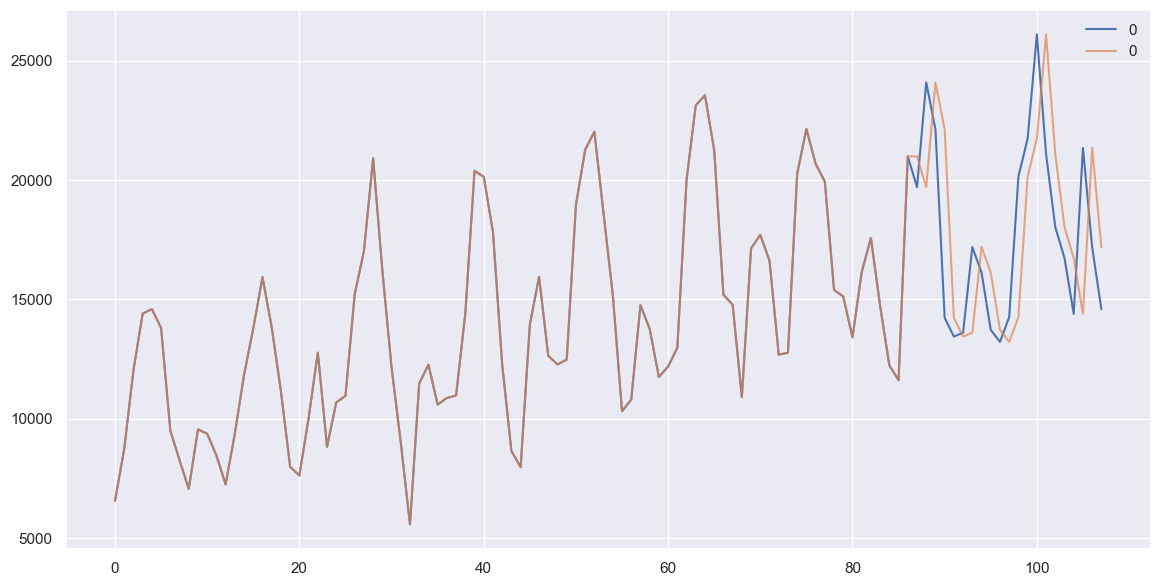

In [339]:
series = pd.read_csv('monthly-car-sales.csv', header = 0, index_col = 0)
nombre="carros"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")

## SARIMA

Tamaño Entrenamiento 87
Tamaño Prueba 21
Encontrando la mejor solución para sarima
72
terminado
[(2, 1, 2), (0, 0, 0, 0), 'n'] 3178.6514632205085
[(2, 1, 2), (0, 0, 0, 0), 'c'] 3204.9418546825905
[(2, 1, 2), (0, 0, 0, 0), 't'] 3243.7884959448243


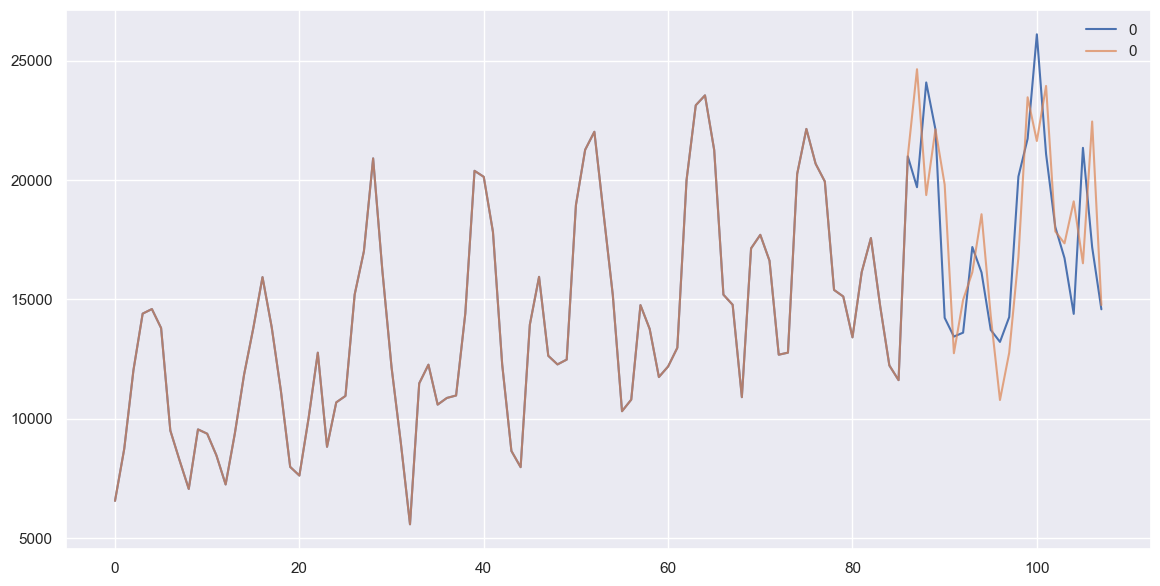

In [340]:
series = pd.read_csv('monthly-car-sales.csv', header = 0, index_col = 0)
nombre="carros"
encontrar_mejor_solucion(series, nombre, metodo = "sarima")

## Alisamiento Exponencial

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


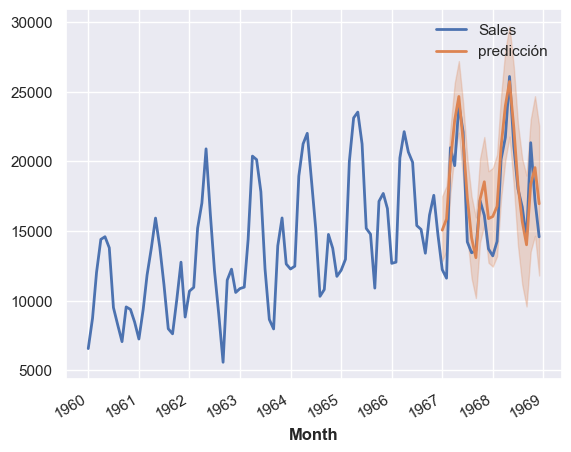

In [342]:
series = pd.read_csv('monthly-car-sales.csv', delimiter=",")
series['Month'] = pd.to_datetime(series['Month'])  # Asegúrate de que la columna 'Month' esté en formato de fecha

# Se crea una serie temporal Darts desde el DataFrame
serie = TimeSeries.from_dataframe(series, 'Month', 'Sales')

# Se divide la serie en conjuntos de entrenamiento y validación
entreno, validacion = serie[:-24], serie[-24:]

# Se crea y ajusta el modelo de alisamiento exponencial
modelo = ExponentialSmoothing()
modelo.fit(entreno)

prediccion = modelo.predict(len(validacion), num_samples=1000)

# Graficar
serie.plot()
prediccion.plot(label="predicción", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()


In [343]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

# Extrae los valores reales y las predicciones como arrays numpy
y_real = validacion.values()
y_pred = prediccion.values()

# Calcula RMSE y MAE
rmse = sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


Root Mean Square Error: 5287.003137084437
Mean Absolute Error: 4803.1625114374065


## Prophet

In [344]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


01:06:32 - cmdstanpy - INFO - Chain [1] start processing
01:06:32 - cmdstanpy - INFO - Chain [1] done processing


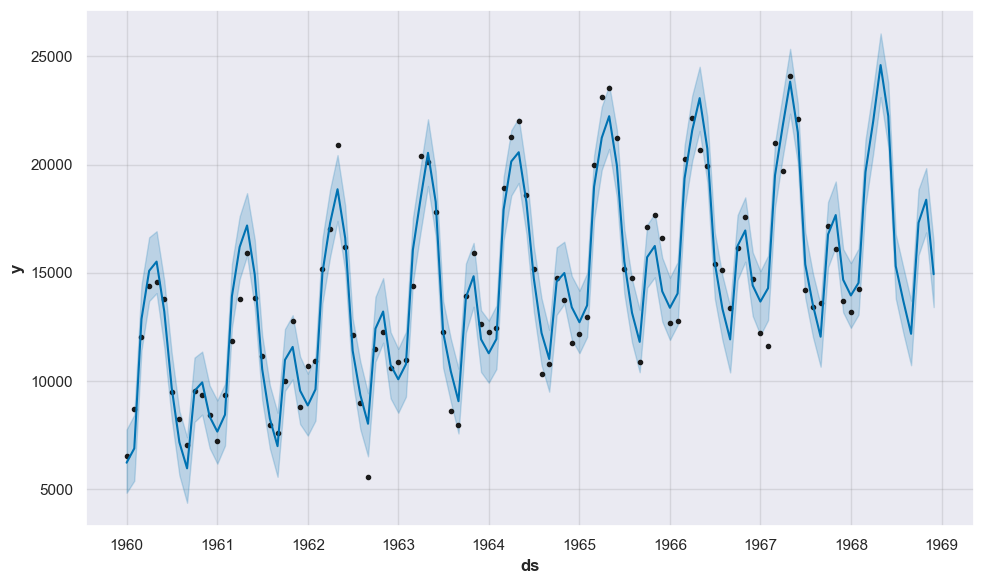

In [345]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Lee el conjunto de datos (si ya lo has hecho, ignora este paso)
# series = pd.read_csv('monthly-mean-temp.csv', delimiter=",")

# Renombra las columnas para que se ajusten a los requisitos de Prophet
series.columns = ['ds', 'y']

# Separa el conjunto de datos en datos de entrenamiento y validación
train = series[:-10]
validation = series[-10:]

# Inicializa y entrena el modelo Prophet
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Realiza las predicciones
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)

# Grafica las predicciones
fig = model.plot(forecast)
plt.show()

In [346]:
# Calcula RMSE y MAE para las predicciones
y_pred = forecast['yhat'][-10:].values
y_real = validation['y'].values

rmse = sqrt(mean_squared_error(y_real, y_pred))
mae = mean_absolute_error(y_real, y_pred)

print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)

Root Mean Square Error: 2073.8620506656066
Mean Absolute Error: 1692.3483764149048


## Red Neuronal

In [350]:
series = pd.read_csv('monthly-car-sales.csv', delimiter=",")
series

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


Epoch 1/100
36/36 [==============================] - 0s 857us/step - loss: 0.0322
Epoch 2/100
36/36 [==============================] - 0s 829us/step - loss: 0.0210
Epoch 3/100
36/36 [==============================] - 0s 800us/step - loss: 0.0198
Epoch 4/100
36/36 [==============================] - 0s 743us/step - loss: 0.0197
Epoch 5/100
36/36 [==============================] - 0s 743us/step - loss: 0.0198
Epoch 6/100
36/36 [==============================] - 0s 771us/step - loss: 0.0196
Epoch 7/100
36/36 [==============================] - 0s 743us/step - loss: 0.0198
Epoch 8/100
36/36 [==============================] - 0s 743us/step - loss: 0.0197
Epoch 9/100
36/36 [==============================] - 0s 686us/step - loss: 0.0198
Epoch 10/100
36/36 [==============================] - 0s 800us/step - loss: 0.0198
Epoch 11/100
36/36 [==============================] - 0s 829us/step - loss: 0.0197
Epoch 12/100
36/36 [==============================] - 0s 914us/step - loss: 0.0197
Epoch 13/100


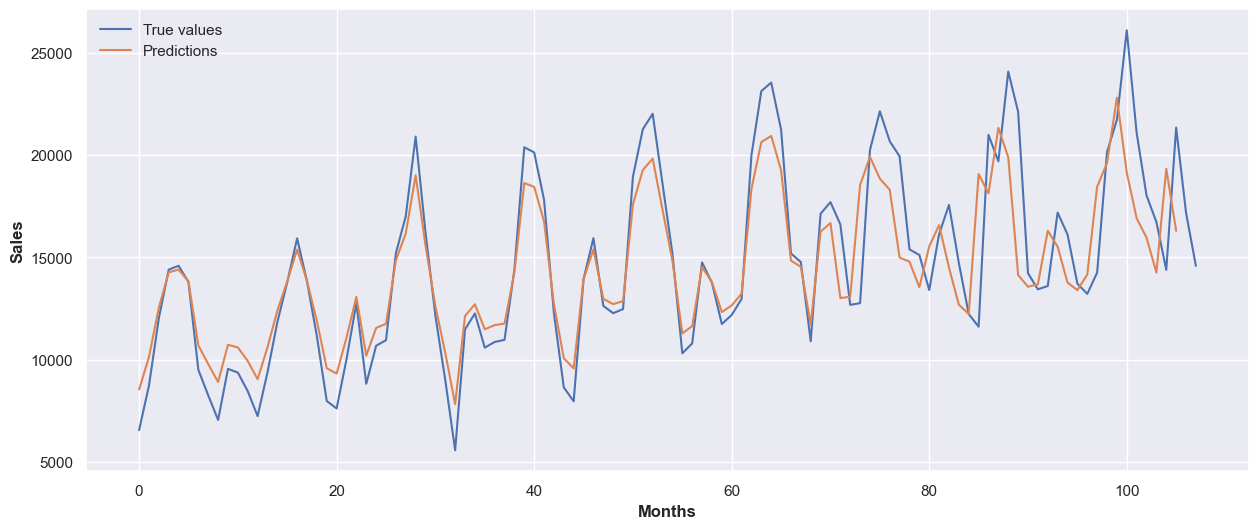

In [352]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Preparar los datos
sales_data = series['Sales'].values.astype(float)
sales_data = np.reshape(sales_data, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
sales_data_normalized = scaler.fit_transform(sales_data)

# Crear conjunto de datos de entrenamiento y prueba
train_size = int(len(sales_data_normalized) * 0.67)
test_size = len(sales_data_normalized) - train_size
train, test = sales_data_normalized[0:train_size, :], sales_data_normalized[train_size:len(sales_data_normalized), :]
X_train, y_train = train[:-1], train[1:]
X_test, y_test = test[:-1], test[1:]

# Construir el modelo
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=1)

# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Desnormalizar las predicciones
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Graficar resultados
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(sales_data_normalized), label='True values')
plt.plot(np.concatenate([train_predict, test_predict]), label='Predictions')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [353]:
# Calcular RMSE y MAE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
train_mae = mean_absolute_error(y_train, train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
test_mae = mean_absolute_error(y_test, test_predict)

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)

Train RMSE: 2866.4951774973238
Train MAE: 2320.6282666703346
Test RMSE: 3434.914877895304
Test MAE: 2510.3376116071427


## Discusion y resultados

**Promedios:** Con un RMSE superior a 3647, los métodos de promedio tienen un rendimiento pobre en este conjunto de datos. Esto sugiere que el conjunto de datos tiene componentes de tendencia y/o estacionalidad que los métodos de promedio no pueden capturar.

**SARIMA:** Este modelo sigue teniendo un buen rendimiento con un RMSE tan bajo como 3178.65, aunque las cifras en general son altas, lo que indica que la serie temporal tiene cierta complejidad. La constante presencia de (2, 1, 2) en los parámetros sugiere un patrón recurrente que SARIMA puede capturar bien.

**Alisamiento Exponencial:** Con un RMSE de 5287 y un MAE de 4803, el alisamiento exponencial no es una buena opción para este conjunto de datos y es superado por otros modelos más sofisticados.

**Prophet:** Este modelo es el mejor en términos de RMSE y MAE, con valores de 2073.86 y 1692.35 respectivamente. Esto sugiere que Prophet es especialmente eficaz para este conjunto de datos, tal vez capturando tendencias o patrones estacionales de una manera más efectiva.

**Redes Neuronales:** Aunque mejor que el alisamiento exponencial, las redes neuronales tienen un rendimiento inferior a SARIMA y Prophet. Su RMSE de entrenamiento y de prueba están relativamente cerca, lo que es una señal de que el modelo no está sobreajustado pero tampoco es el más eficiente.

# **Conclusiones**

- Cada conjunto de datos tiene sus propias características y complejidades que hacen que ciertos modelos sean más adecuados que otros. 
- Los diferentes tamaños de los conjuntos de entrenamiento y prueba, así como las métricas resultantes, demuestran la importancia de la validación cruzada y la evaluación cuidadosa del rendimiento del modelo.
- Aunque las métricas como RMSE y MAE son cruciales para evaluar el rendimiento del modelo, el contexto del negocio o la aplicación final del modelo también es crucial. 